# Citymapper Mobility Index

The Citymapper Mobility Index is calculated by comparing trips planned in the Citymapper app to a recent typical usage period. Trips planned ('Get Me Somewhere' and related) are correlated to trips taken (GO mode). Typical usage period is defined as 4 weeks between Jan 6th and Feb 2nd, 2020. To better capture typical usage in certain cities we are using different periods in Paris (Feb 3rd to March 1st) and Hong Kong and Singapore (both Dec 2nd to Dec 22nd). A day is defined as midnight to midnight UTC, thus for certain cities may not correspond with calendar days. We update the data every day at 7am UTC.

Our users are public transport users and also use us for walking, cycling, and some micromobility and cabs. We are not used for driving. We do not track the demographics of our users. We have enough data in our published cities to be confident that it represents a real change in behaviour. However, it is a sample set of general mobility and may not represent the real world exactly.

Journalists and public interest researchers may use this information as long as they attribute it to Citymapper and link to Citymapper.com/CMI. All others who wish to use this information, please contact us from our website.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
import os

In [2]:
# Go to repository root directory
if "_changed_dir" not in locals():
    os.chdir("../")
    _changed_dir = True

## Data download

In [3]:
raw_data_dir = 'data/raw'
if not os.path.exists(raw_data_dir):
    os.makedirs(raw_data_dir)

In [4]:

file_name = 'Citymapper_Mobility_Index.csv'
url = "https://cdn.citymapper.com/data/cmi/Citymapper_Mobility_Index_20200616.csv"

file_path = os.path.join(raw_data_dir, file_name)

myfile = requests.get(url)
open(file_path, 'wb').write(myfile.content)

26413

## Dataset features

In [12]:
citymap_mob = pd.read_csv(file_path, header=3, parse_dates=['Date'])

In [13]:
citymap_mob.columns

Index(['Date', 'Amsterdam', 'Barcelona', 'Berlin', 'Birmingham', 'Boston',
       'Brussels', 'Chicago', 'Copenhagen', 'Hamburg', 'Hong Kong', 'Istanbul',
       'Lisbon', 'London', 'Los Angeles', 'Lyon', 'Madrid', 'Manchester',
       'Melbourne', 'Mexico City', 'Milan', 'Monaco', 'Montréal', 'Moscow',
       'New York City', 'Paris', 'Philadelphia', 'Rhine-Ruhr', 'Rome',
       'San Francisco', 'Seattle', 'Seoul', 'Singapore', 'St. Petersburg',
       'Stockholm', 'Sydney', 'São Paulo', 'Tokyo', 'Toronto', 'Vancouver',
       'Vienna', 'Washington DC'],
      dtype='object')

In [15]:
print(f"Unique cities in dataset: {len(citymap_mob.columns)}")
# Note if two countries have same region name this number will be wrong:
print(f"Data in range: {citymap_mob.Date.min()} to {citymap_mob.Date.max()}")

Unique cities in dataset: 42
Data in range: 2020-01-20 00:00:00 to 2020-06-15 00:00:00


## Reindex data

Use a multi index to separate date and geography information

In [17]:
citymap_mob.set_index('Date', inplace=True)

## Plotting data for city mapper index 

In [18]:
citymap_mob.columns

Index(['Amsterdam', 'Barcelona', 'Berlin', 'Birmingham', 'Boston', 'Brussels',
       'Chicago', 'Copenhagen', 'Hamburg', 'Hong Kong', 'Istanbul', 'Lisbon',
       'London', 'Los Angeles', 'Lyon', 'Madrid', 'Manchester', 'Melbourne',
       'Mexico City', 'Milan', 'Monaco', 'Montréal', 'Moscow', 'New York City',
       'Paris', 'Philadelphia', 'Rhine-Ruhr', 'Rome', 'San Francisco',
       'Seattle', 'Seoul', 'Singapore', 'St. Petersburg', 'Stockholm',
       'Sydney', 'São Paulo', 'Tokyo', 'Toronto', 'Vancouver', 'Vienna',
       'Washington DC'],
      dtype='object')

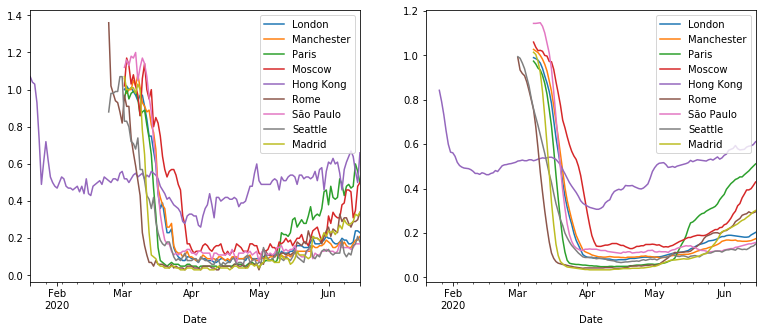

In [38]:
city_list = ['London', 'Manchester', 'Paris', 'Moscow', 'Hong Kong', 'Rome', 'São Paulo', 'Seattle', 'Madrid']

fig, axs = plt.subplots(1,2)
axs[0].figure.set_size_inches(13, 5)
citymap_mob[city_list].plot(ax=axs[0])
citymap_mob[city_list].rolling(7).mean().plot(ax=axs[1])

## Notes on the CityMapper mobility data

Suspect a heavy bias in the users of the data, will need to correlate with google, to see what differences there may be.

My suspition is that citymapper is used by more "tech savvy" people? If true it probably correlates with loads of other things making it not a very representative demographic.

Structure of the data with columns being geography might make it harder to merge with other mobility sources.